# HHA550_Stroke Prediction Dataset

## Healtcare-dataset-stroke-data

#### (Check Modules folders for csv and ipynb for each class)

# DATA
## Stroke Prediction Dataset


#### 
Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

    1) id: unique identifier

    2) gender: "Male", "Female" or "Other"

    3) age: age of the patient

    4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

    5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

    6) ever_married: "No" or "Yes"

    7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

    8) Residence_type: "Rural" or "Urban"

    9) avg_glucose_level: average glucose level in blood

    10) bmi: body mass index

    11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

    12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# .CSV Data
### Healtcare-dataset-stroke-data.csv

# IMPORTING Everthing

In [1]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# %pip install seaborn
# %pip install missingno
# %pip install xgboost
# %pip install catboost
# %pip install regex
# %pip install sklearn
# %pip install pandas
# %pip install numpy
# %pip install imblearn
# %pip install lightgbm

In [1]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

Import additional items as needed...
We may not use them all in this course...

In [2]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            precision_score, recall_score, roc_auc_score,\
                            plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

* If from imblearn.oversampling import SMOTE does not load use
    `conda install -c conda-forge imbalanced-learn`
* Then rerun
    `from imblearn.over_sampling import SMOTE`

# Exploratory Data Analysis (EDA)

## Start with Loading the CSV Data

In [3]:
#upload the csv and declare its name to = the csv
#for this course we will name the dataframe 'stroke', but you can change it to df or anything else you want.

#Find the file path to the .csv
    #Then use code below to read .csv

# stroke = pd.read_csv('x')
#for PC file path will use /  
         #Original PC file path 'C:\Users\kaden\Desktop\HHA550_Stroke_Data\healthcare-dataset-stroke-data.csv'
         #Change PC file path for Python to C:/Users/kaden/Desktop/Python_Diabetes Dataset/dataset_diabetes/diabetic_data.csv'
    #for MAC file path will use //
         #Original MAC file path 'C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv'
         #Change MAC file path for Python to 'C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv'

#for PC (running PC for this example)
# stroke = pd.read_csv('C:/Users/kaden/Desktop/HHA550_Stroke_Data/healthcare-dataset-stroke-data.csv')
diabetes = pd.read_csv('clean_diabetic_data.csv')

#for MAC
#stroke = pd.read_csv('C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv')

#### Looking at the data
Now we will try to look at the some of the rows of the dataframe. If you need to see more than 5 lines of the dataframe you can use the parameter inside the 'head' function. 
Like: 'stroke.head(n = 10)'

In [4]:
#make sure csv has been assigned to declared name and can be read
diabetes.head()

# this command will give you the first 5 lines of the csv (0,1,2,3,4)

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2278392,8222157,1,2,10,6,25,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,149190,55629189,1,2,20,1,1,7,3,...,0,10,0,0,0,0,0,1,1,1
2,2,64410,86047875,2,2,30,1,1,7,2,...,0,0,0,0,0,0,0,0,1,0
3,3,500364,82442376,1,1,40,1,1,7,2,...,0,10,0,0,0,0,0,1,1,0
4,4,16680,42519267,1,1,50,1,1,7,1,...,0,1,0,0,0,0,0,1,1,0


In [4]:
diabetes.dtypes

Unnamed: 0                    int64
encounter_id                  int64
patient_nbr                   int64
race                          int64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
medical_specialty           float64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                 

# Exploring and Understanding the Data


### Initial Insights
* That makes it a lot easier to compare the missing value percentages within the columns.
* In our dataset, we have both numerical and categorical variables.
* It is essential to see whether columns are correctly inferred.
* The most important one to look for is our target variable 'stroke'
* 'Stroke' is detected as an integer, not as an object.
* Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)
* Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object.
* Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease)
* And 0 for the negative cases (does not have hypertension/heart disease)
* We don't need to change them, but it is good to see and be aware of it.
* In addition to them, we have 3 categorical variables, which we have to encode as numerical

**Note: In this case we do not need to know the exact missing percentage of the columns.**

# What are the current problems we have that need to be solved?
* We have binary classification problem.
* We make prection on the target variable `stroke`
* And we will build a model to get best prediction on the stroke variable.

## Insights into our target variable
* One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [5]:
y = diabetes['readmitted']
print(f'Percentage of patient had a readmission: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a readmission: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a readmission: % 11.16 --> (11357 patient)
Percentage of patient did not have a readmission: % 88.84 --> (90409 patient)


### So what does that all mean?
We have imbalanced data

* 11.16% of the instances of our target variable is `30 day readmissions`
* 11357 patients readmitted within 30 days
* 88.84% of the instances of our target variable is `no readmission or readmission over 30 days`
* 90409 patients did not readmit within 30 days.

### Visualize stroke

In [7]:
fig = px.histogram(diabetes, x="readmitted", title='Readmitted within 30 days', width=400, height=400)
fig.show()

## Data Imbalance

* Instances across classes are imbalanced, like in our dataset, we have imbalance data.

* The problem is, most of the machine learning algorithm do not work well with the imbalanced data.

* Some of the metrics (like accuracy) give us misleading results.

* Most of the time in classification problems our interest is to get better predict on the minority class.

* In our example: People had a stroke is minority class.

* Otherwise our machine learning algorithm falsely predicts majority class.

* In our example: No stroke is majority class

## Decide on Metrics

* This is the first step when approaching a machine learning problem: decide the metric!

* The choice of the wrong metric can mean choosing the wrong algorithm.

* We see that the target is skewed and thus the best metric for this binary classification problem would be Area Under the ROC Curve (AUC).

* We can use precision and recall too, but AUC combines these two metrics.

* We have already seen the label/target distribution, and we know that it is a binary classification problem with skewed targets. Thus, we will be using StratifiedKFold to split the data

* Just for further info, it is not advisable to use accuracy as an evaluation metric, when dealing with higly imbalanced data

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                101766 non-null  int64  
 1   encounter_id              101766 non-null  int64  
 2   patient_nbr               101766 non-null  int64  
 3   race                      101766 non-null  int64  
 4   gender                    101766 non-null  int64  
 5   age                       101766 non-null  int64  
 6   admission_type_id         101766 non-null  int64  
 7   discharge_disposition_id  101766 non-null  int64  
 8   admission_source_id       101766 non-null  int64  
 9   time_in_hospital          101766 non-null  int64  
 10  medical_specialty         101309 non-null  float64
 11  num_lab_procedures        101766 non-null  int64  
 12  num_procedures            101766 non-null  int64  
 13  num_medications           101766 non-null  i

### Check for Missing Data / Missing Values

In [9]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes)

,Missing_Number,Missing_Percent
medical_specialty,457,0.004491
Unnamed: 0,0,0.000000
tolazamide,0,0.000000
glimepiride,0,0.000000
acetohexamide,0,0.000000
glipizide,0,0.000000
glyburide,0,0.000000
tolbutamide,0,0.000000
pioglitazone,0,0.000000
rosiglitazone,0,0.000000


<AxesSubplot:>

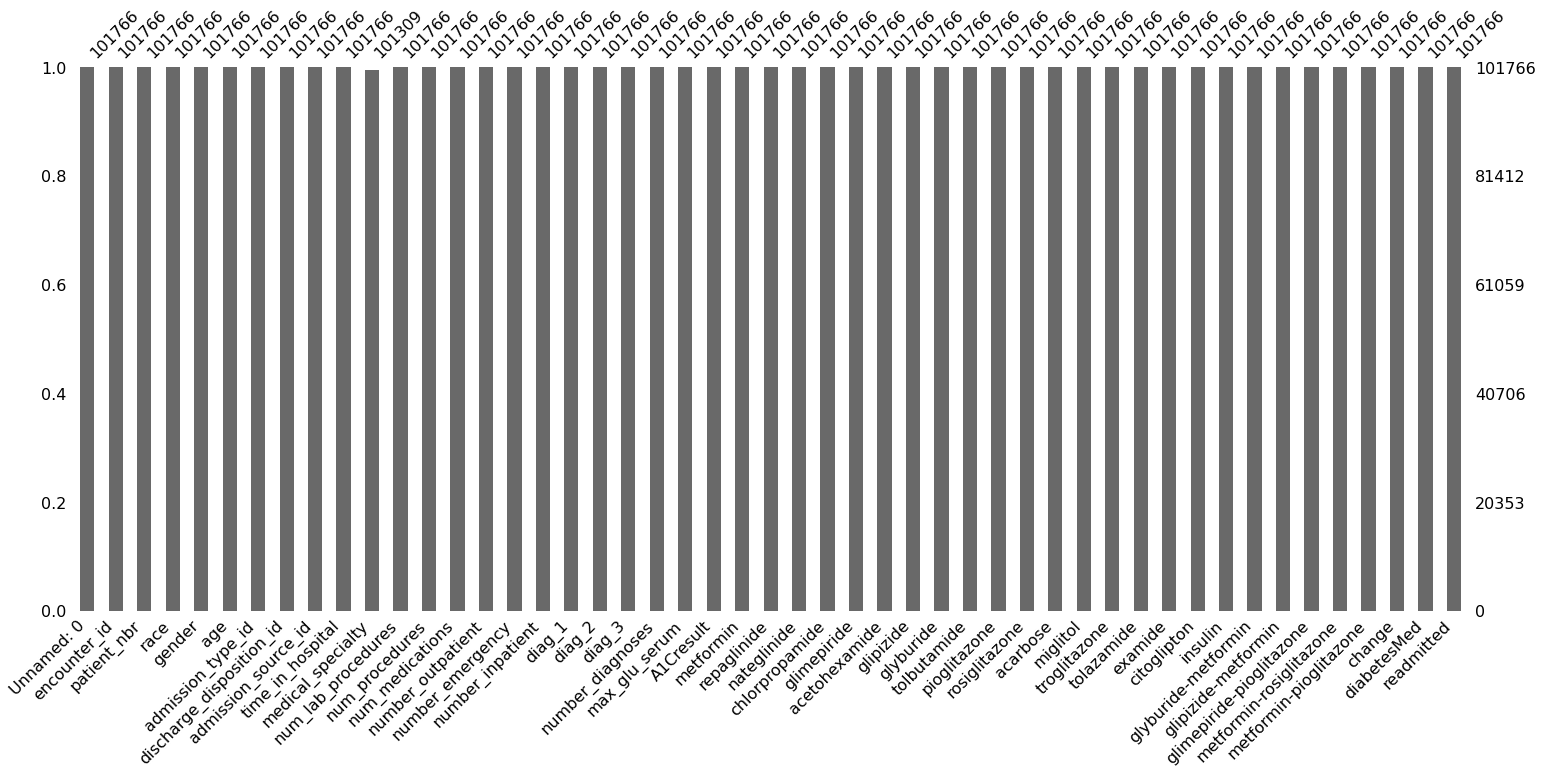

In [10]:
# Visualizing the missing data to get more idea
msno.bar(diabetes)

<AxesSubplot:>

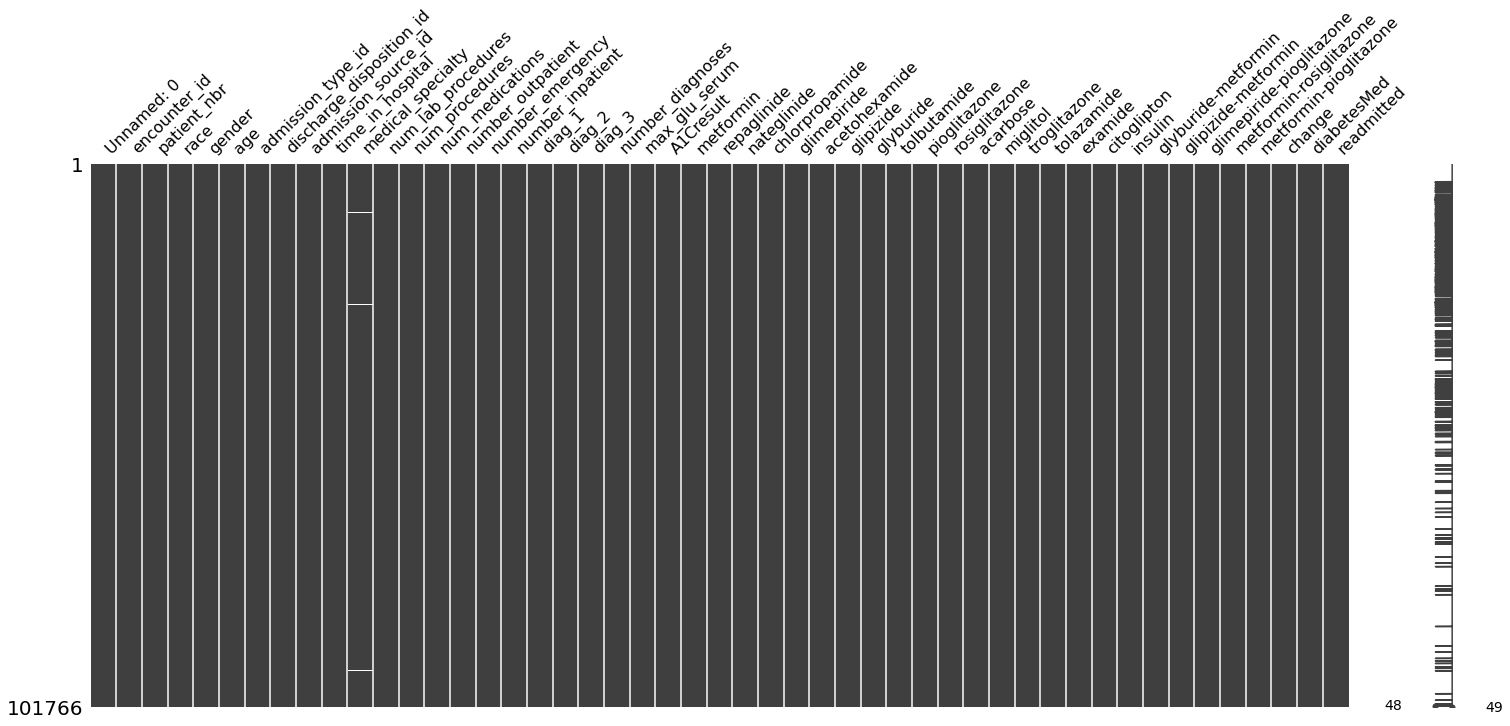

In [11]:
msno.matrix(diabetes)

* We have missing values on the 'medical_specialty', which is at around 457 instances.
* It seem that we have random missing values.
* We will handle it by using pipeline during the modeling.

# Numerical Features
* Look at the data elements (columns) using `diabetes.head()`
* Look at the Dtype (data type) using `diabetes.info()`

In [12]:
diabetes.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2278392,8222157,1,2,10,6,25,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,149190,55629189,1,2,20,1,1,7,3,...,0,10,0,0,0,0,0,1,1,0
2,2,64410,86047875,2,2,30,1,1,7,2,...,0,0,0,0,0,0,0,0,1,0
3,3,500364,82442376,1,1,40,1,1,7,2,...,0,10,0,0,0,0,0,1,1,0
4,4,16680,42519267,1,1,50,1,1,7,1,...,0,1,0,0,0,0,0,1,1,0


In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                101766 non-null  int64  
 1   encounter_id              101766 non-null  int64  
 2   patient_nbr               101766 non-null  int64  
 3   race                      101766 non-null  int64  
 4   gender                    101766 non-null  int64  
 5   age                       101766 non-null  int64  
 6   admission_type_id         101766 non-null  int64  
 7   discharge_disposition_id  101766 non-null  int64  
 8   admission_source_id       101766 non-null  int64  
 9   time_in_hospital          101766 non-null  int64  
 10  medical_specialty         101309 non-null  float64
 11  num_lab_procedures        101766 non-null  int64  
 12  num_procedures            101766 non-null  int64  
 13  num_medications           101766 non-null  i

In [14]:
diabetes.describe()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.0,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50882.500000,1.652016e+08,5.433040e+07,1.284555,1.537557,70.967022,2.024006,3.715642,5.754437,4.395987,...,0.0,2.015398,0.007881,0.000128,0.000010,0.000020,0.000010,0.461952,0.770031,0.111599
std,29377.458084,1.026403e+08,3.869636e+07,0.709696,0.498649,15.940838,1.445403,5.280166,4.064081,2.985108,...,0.0,3.219088,0.126780,0.011302,0.003135,0.004433,0.003135,0.498553,0.420815,0.314874
min,0.000000,1.252200e+04,1.350000e+02,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25441.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50882.500000,1.523890e+08,4.550514e+07,1.000000,2.000000,70.000000,1.000000,1.000000,7.000000,4.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,76323.750000,2.302709e+08,8.754595e+07,1.000000,2.000000,80.000000,3.000000,4.000000,7.000000,6.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,101765.000000,4.438672e+08,1.895026e+08,5.000000,2.000000,100.000000,8.000000,28.000000,25.000000,14.000000,...,0.0,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* We have all numerical features on the dataset.

* All of our numerical features are measured in different scales.

* Many machine learning algorithms perform better standard range scaled numerical variables (such as Linear models,artificial neural networks, K-nearest Neighbors,support vector machines, etc.)

* Tree models (such as, decision trees,random forest, etc.) work fine with different range numerical features.

* Let's check out the skewness

### Skewness

In [15]:
diabetes.skew()

Unnamed: 0                    0.000000
encounter_id                  0.699142
patient_nbr                   0.471281
race                          2.771763
gender                       -0.151368
age                          -0.630539
admission_type_id             1.591984
discharge_disposition_id      2.563067
admission_source_id           1.029935
time_in_hospital              1.133999
medical_specialty             3.936814
num_lab_procedures           -0.236544
num_procedures                1.316415
num_medications               1.326672
number_outpatient             8.832959
number_emergency             22.855582
number_inpatient              3.614139
number_diagnoses             -0.876746
max_glu_serum                 5.248889
A1Cresult                     2.351736
metformin                     7.073306
repaglinide                  23.744916
nateglinide                  43.002112
chlorpropamide              105.949746
glimepiride                  13.045399
acetohexamide            

### Univariate Analysis

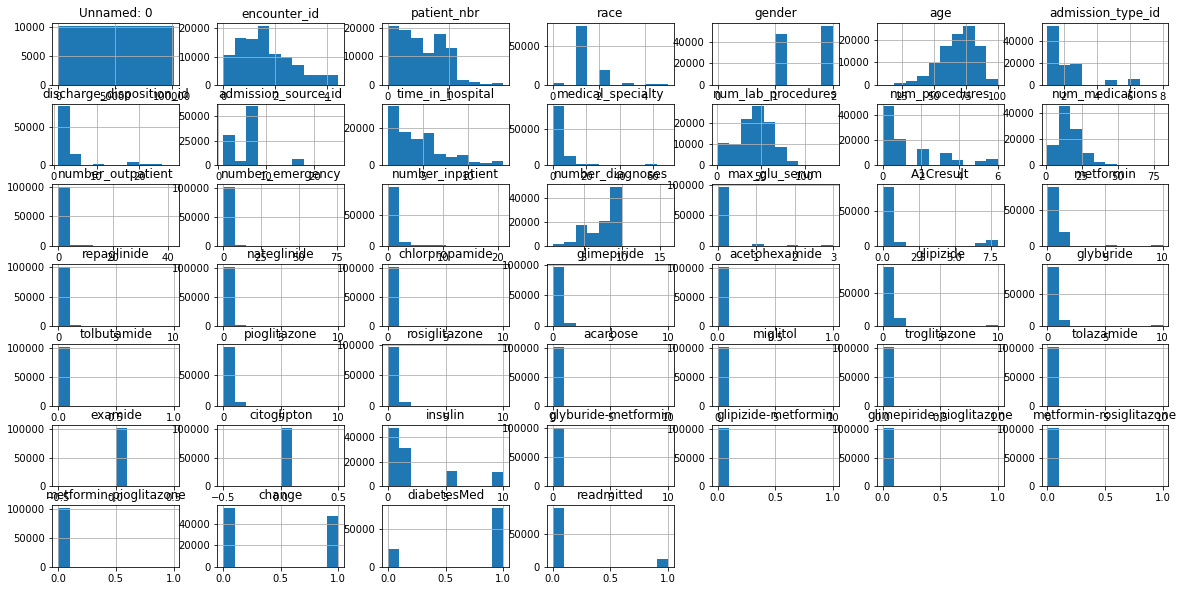

In [16]:
diabetes.hist(figsize=(20,10));

* As seen in both skewness result and histograms, numerical features have skewness in different degrees
* We will deal with different scale and skewness during the modeling by using standardization `Standard scaler`

### Correlation Matrix & Scatter Plots

In [17]:
diabetes.corr()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
Unnamed: 0,1.000000,0.967810,0.527166,-0.022384,-0.004561,0.077178,-0.164777,-0.147786,-0.136810,-0.066216,...,NaN,0.158645,0.023495,0.002777,0.002801,0.006057,0.005097,0.111114,0.058297,-0.008995
encounter_id,0.967810,1.000000,0.512028,-0.013798,-0.006025,0.071716,-0.158961,-0.132876,-0.112402,-0.062221,...,NaN,0.142550,0.018754,0.000592,0.002089,0.006630,0.007285,0.096372,0.051817,-0.008519
patient_nbr,0.527166,0.512028,1.000000,0.003898,-0.006694,0.070991,-0.011128,-0.136814,-0.032568,-0.024092,...,NaN,0.070278,0.015372,-0.003550,-0.001050,0.009475,-0.001052,0.054842,0.017232,0.007893
race,-0.022384,-0.013798,0.003898,1.000000,0.032111,-0.131552,-0.031987,-0.002726,-0.001342,-0.002254,...,NaN,0.033735,-0.001880,-0.004532,-0.001257,-0.008024,-0.001257,0.008243,0.000903,-0.002889
gender,-0.004561,-0.006025,-0.006694,0.032111,1.000000,0.050535,-0.014592,0.020847,0.003843,0.029928,...,NaN,-0.003547,-0.002350,-0.006954,0.002907,-0.004779,0.002907,-0.014905,-0.015901,0.002939
age,0.077178,0.071716,0.070991,-0.131552,0.050535,1.000000,-0.007209,0.114323,0.044696,0.107515,...,NaN,-0.083236,-0.000562,0.002042,-0.000190,0.002512,-0.000190,-0.036019,-0.022601,0.017634
admission_type_id,-0.164777,-0.158961,-0.011128,-0.031987,-0.014592,-0.007209,1.000000,0.083483,0.106654,-0.012500,...,NaN,0.010296,-0.001461,-0.004399,-0.002221,-0.000074,0.002117,0.007274,-0.000310,-0.011651
discharge_disposition_id,-0.147786,-0.132876,-0.136814,-0.002726,0.020847,0.114323,0.083483,1.000000,0.018193,0.162748,...,NaN,-0.008478,-0.006531,0.000444,-0.001612,-0.000181,-0.000425,-0.012307,-0.028887,0.050560
admission_source_id,-0.136810,-0.112402,-0.032568,-0.001342,0.003843,0.044696,0.106654,0.018193,1.000000,-0.006965,...,NaN,0.018611,-0.018405,-0.000387,0.000961,-0.001914,-0.003667,0.002435,0.001500,0.005820
time_in_hospital,-0.066216,-0.062221,-0.024092,-0.002254,0.029928,0.107515,-0.012500,0.162748,-0.006965,1.000000,...,NaN,0.129629,-0.003157,-0.000626,-0.002516,-0.000588,0.001684,0.109173,0.062520,0.044199


In [19]:
corr = diabetes.corr()
diabetes[diabetes.columns[1:]].corr()['readmitted'].sort_values(ascending=False)[:10]

readmitted                  1.000000
number_inpatient            0.165147
number_emergency            0.060747
discharge_disposition_id    0.050560
number_diagnoses            0.049524
time_in_hospital            0.044199
num_medications             0.038432
insulin                     0.036201
diabetesMed                 0.027125
num_lab_procedures          0.020364
Name: readmitted, dtype: float64

In [21]:
diabetes.groupby('readmitted').mean()


,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
0,50976.157219,1.655115e+08,5.422214e+07,1.285281,1.537037,70.867392,2.029975,3.621022,5.746054,4.349224,...,0.0,0.0,1.974095,0.007964,0.000133,0.000011,0.000022,0.000011,0.458505,0.765986
1,50136.928502,1.627347e+08,5.519219e+07,1.278771,1.541692,71.760148,1.976490,4.468874,5.821168,4.768249,...,0.0,0.0,2.344193,0.007220,0.000088,0.000000,0.000000,0.000000,0.489390,0.802237


It looks like there is a strong correlation between the following features:
- Number of Inpatient Days
- Number of Diagnoses
- Time in Hospital
- Number of Medications
- Change in Diabetes Medication
- Metformin
- Number of Lab Procedures
- Change in Medication

# Clean the Data (Feature Engineering)

## There are two options for cleaning this data.  
       1) Cleaning the .csv in Excel
       2) Cleaning the data in Python/Jupyter Notebook
              (We will show how to clean the data in the Notebook)
              
## You may skip this step if you clean your dataset in the .csv document
        (see healthcare-dataset-stroke-data(clean_dataset).csv

### What data are we going to do?
### 1) Drop unnecessary data
### 2) Check for duplicates
### 3) Check for missing data

### Step 1: Drop the columns that are either missing most of the times or are not relevant
* The `id` is an identifier to uniquely identify the visit of a patient in a hospital. Each of the rows are individual instances. Also, there is no importance of this variable from prediction point to of view and hence it would be wise to drop this too.

In [22]:
diabetes.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [23]:
# Dropping the columns which are not required
diabetes.drop(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
       'num_procedures', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'], axis = 1, inplace = True)

In [24]:
# Lets see what we just did
diabetes.head()

,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,readmitted
0,1,41,1,1,0
1,3,59,18,9,0
2,2,11,13,6,0
3,2,44,16,7,0
4,1,51,8,5,0


### Step 3: Check for missing data

In [27]:
#lets understand the data a bit
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   time_in_hospital    101766 non-null  int64
 1   num_lab_procedures  101766 non-null  int64
 2   num_medications     101766 non-null  int64
 3   number_diagnoses    101766 non-null  int64
 4   readmitted          101766 non-null  int64
dtypes: int64(5)
memory usage: 3.9 MB


# Breaking the data up into Train & Test

In [28]:
train_df, valid_df, test_df = np.split(diabetes.sample(frac=1, random_state=42), 
                                       [int(.7*len(diabetes)), int(0.85*len(diabetes))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [30]:
diabetes.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [31]:
train_df.readmitted.value_counts()

0    63275
1     7961
Name: readmitted, dtype: int64

In [32]:
valid_df.readmitted.value_counts()

0    13520
1     1745
Name: readmitted, dtype: int64

In [33]:
test_df.readmitted.value_counts()

0    13614
1     1651
Name: readmitted, dtype: int64

# Treating the Imbalance in the Data

Imbalance in the data means that one of the classes in the data is too less as compared to the others. Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:

* Sub-sample the more dominant class: use a random subset of the negatives
* Over-sample the imbalanced class: use the same positive samples multiple times
* Create synthetic positive data

Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement.

In [34]:
def calc_prevalence(y_actual):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''
    
    return (sum(y_actual)/len(y_actual))

In [37]:
# split the training data into positive and negative
rows_pos = train_df.readmitted == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
stroke_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples 
stroke_df_balanced = stroke_df_balanced.sample(n = len(stroke_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(stroke_df_balanced), \
                                                calc_prevalence(stroke_df_balanced.readmitted.values)))

Train balanced prevalence(n = 15922):0.500


In [38]:
stroke_df_balanced.readmitted.value_counts()

1    7961
0    7961
Name: readmitted, dtype: int64

In [39]:
X_train = stroke_df_balanced.drop('readmitted',axis=1)

y_train = stroke_df_balanced['readmitted']

X_valid = valid_df.drop('readmitted',axis=1)

y_valid = valid_df['readmitted']

X_test = test_df.drop('readmitted',axis=1)

y_test = test_df['readmitted']

In [40]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   time_in_hospital    101766 non-null  int64
 1   num_lab_procedures  101766 non-null  int64
 2   num_medications     101766 non-null  int64
 3   number_diagnoses    101766 non-null  int64
 4   readmitted          101766 non-null  int64
dtypes: int64(5)
memory usage: 3.9 MB


In [41]:
scaler=StandardScaler()
X_train[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']] = pd.DataFrame(scaler.fit_transform(X_train[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']]),columns=['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses'])
X_valid[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']] = pd.DataFrame(scaler.transform(X_valid[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']]),columns=['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses'])
X_test[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']] = pd.DataFrame(scaler.transform(X_test[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']]),columns=['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses'])

# Creating and Understanding Models

In [42]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    
    '''
    This function calculates all the metrics to asses the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

## Linear Regression

In [43]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)


y_valid_preds = lnr.predict(X_valid)

In [44]:
y_valid_preds

array([0.51068724, 0.40739556, 0.55946658, ..., 0.48536316, 0.36597555,
       0.55233447])

## Logistic Regression

In [45]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.549
accuracy:0.506
recall:0.579
precision:0.129
specificity:0.497
prevalence:0.114
 


## KNN Model

In [46]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

knn_preds = knn.predict_proba(X_valid)[:,1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,knn_preds, 0.5)

AUC:0.547
accuracy:0.508
recall:0.565
precision:0.128
specificity:0.454
prevalence:0.114
 


## Stochastic Gradient Descent Model

In [47]:
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

sgd_preds = sgdc.predict_proba(X_valid)[:,1]

print('Stochastic Gradient Descent')
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, \
                sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,sgd_preds, 0.5)

Stochastic Gradient Descent
Validation:
AUC:0.550
accuracy:0.524
recall:0.564
precision:0.131
specificity:0.518
prevalence:0.114
 


## Decision Tree

In [48]:
dc_clf = DecisionTreeClassifier(random_state=42, max_depth = 10)
dc_clf.fit(X_train, y_train)

dc_preds_proba = dc_clf.predict_proba(X_valid)[:,1]
dc_preds = dc_clf.predict(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,dc_preds_proba, 0.5)

AUC:0.527
accuracy:0.427
recall:0.648
precision:0.122
specificity:0.386
prevalence:0.114
 


## Random Forest

In [49]:
rf_clf = RandomForestClassifier(random_state=111, max_depth = 6)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_valid)
rf_preds_proba = rf_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,rf_preds_proba, 0.5)

AUC:0.553
accuracy:0.489
recall:0.604
precision:0.129
specificity:0.474
prevalence:0.114
 


## Linear SVC

In [50]:
lsvc_clf = LinearSVC(random_state=111)
lsvc_clf.fit(X_train, y_train)

lsvc_preds = lsvc_clf.decision_function(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,lsvc_preds, 0.5)

AUC:0.549
accuracy:0.886
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.114
 


## Gradient Boosting Model

In [51]:
gb_clf = GradientBoostingClassifier(n_estimators = 100, criterion='friedman_mse', learning_rate = 1.0, max_depth = 3,\
                                    random_state = 111)

gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_valid)
gb_preds_proba = gb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,gb_preds_proba, 0.5)

AUC:0.540
accuracy:0.485
recall:0.579
precision:0.124
specificity:0.473
prevalence:0.114
 


## XGB Model

In [52]:
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate = 1.0, use_label_encoder = False,\
                            eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_valid)
xgb_preds_proba = xgb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,xgb_preds_proba, 0.5)

AUC:0.542
accuracy:0.499
recall:0.566
precision:0.125
specificity:0.490
prevalence:0.114
 


## Catboost Model

In [53]:
catb=CatBoostClassifier(iterations=200, depth=3, learning_rate=1.0, random_state = 111)
catb.fit(X_train, y_train)
catb_preds = catb.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,catb_preds, 0.5)

0:	learn: 0.6878948	total: 143ms	remaining: 28.4s
1:	learn: 0.6866173	total: 150ms	remaining: 14.8s
2:	learn: 0.6859679	total: 154ms	remaining: 10.1s
3:	learn: 0.6851749	total: 159ms	remaining: 7.79s
4:	learn: 0.6848584	total: 164ms	remaining: 6.39s
5:	learn: 0.6844758	total: 169ms	remaining: 5.46s
6:	learn: 0.6842453	total: 174ms	remaining: 4.79s
7:	learn: 0.6839191	total: 179ms	remaining: 4.29s
8:	learn: 0.6836653	total: 185ms	remaining: 3.92s
9:	learn: 0.6830672	total: 189ms	remaining: 3.6s
10:	learn: 0.6827431	total: 195ms	remaining: 3.35s
11:	learn: 0.6822329	total: 199ms	remaining: 3.11s
12:	learn: 0.6818762	total: 204ms	remaining: 2.93s
13:	learn: 0.6816647	total: 208ms	remaining: 2.77s
14:	learn: 0.6811135	total: 213ms	remaining: 2.63s
15:	learn: 0.6805813	total: 219ms	remaining: 2.52s
16:	learn: 0.6802131	total: 223ms	remaining: 2.4s
17:	learn: 0.6801242	total: 229ms	remaining: 2.31s
18:	learn: 0.6795291	total: 233ms	remaining: 2.22s
19:	learn: 0.6791296	total: 238ms	remaining

# Hyper Parameter Tuning

* From the above models we will choose two models for demonstration i.e. Random Forest, Decision Trees for hyper-parameter tuning.
* Generally you can pick up the top three models based on the 'AUC', 'Recall' or 'F1 score' score and tune them.

There are many techniques for hyper-parameter tuning:

* Random Search
* Grid Search
* Halving Grid Search(added recently in sklearn)

Special Note:
* It will take significant time to run Hyper Parameter Tuning 
* Timing will depend on available resources of server

In [54]:
recall_scoring = make_scorer(recall_score)

## Decision Tree - Hyper Parameter Tuning

In [55]:
dc_grid = {'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

dc_random = RandomizedSearchCV(estimator = dc_clf, param_distributions = dc_grid, 
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

dc_random.fit(X_train, y_train)

dc_random.best_params_

dc_hp_preds = dc_random.best_estimator_.predict(X_valid)
dc_hp_preds_proba = dc_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, dc_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.5360083331920448

In [56]:
recall_score(y_valid, dc_hp_preds)

0.6905444126074498

## Random Forest - Hyper Parameter Tuning

In [57]:
rf_grid = {'n_estimators':range(200,1000,200), # number of trees
           'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = rf_grid, 
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

rf_random.fit(X_train, y_train)

rf_random.best_params_

rf_hp_preds = rf_random.best_estimator_.predict(X_valid)
rf_hp_preds_proba = rf_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, rf_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.5517946245401061

In [58]:
recall_score(y_valid, rf_hp_preds)

0.6263610315186247

## XGBoost - Hyper Parameter Tuning

In [59]:
xgb_grid = params = {
        'min_child_weight': [1, 5, 8, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5]
        } # criterion for evaluating a split

xgb_random = GridSearchCV(estimator = xgb_clf, param_grid = xgb_grid, 
                               cv = 2, scoring = recall_scoring,
                               verbose = 1)

xgb_random.fit(X_train, y_train)

xgb_random.best_params_

xgb_hp_preds = xgb_random.best_estimator_.predict(X_valid)
xgb_hp_preds_proba = xgb_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, xgb_hp_preds_proba)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


0.5456763830725149

In [60]:
recall_score(y_valid, xgb_hp_preds)

0.5833810888252149